# **IPL Data Analysis (2008-2020)**
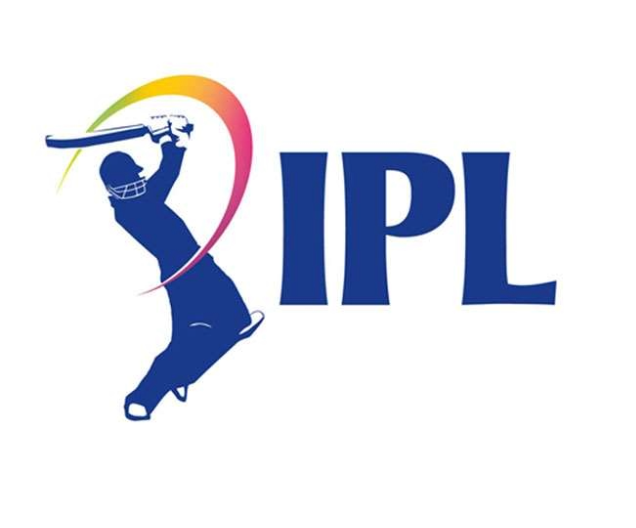

This notebook performs an exploratory data analysis on the Indian Premier League (IPL) matches and ball-by-ball data from the 2008 to 2020 seasons.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ball_df= pd.read_csv('/content/IPL Ball-by-Ball 2008-2020.csv')
matches_df = pd.read_csv('/content/IPL Matches 2008-2020.csv')

In [ ]:
matches_df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [ ]:
ball_df

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [ ]:
matches_df['date'] = pd.to_datetime(matches_df['date'])

In [ ]:
matches_df['season'] = matches_df['date'].dt.year

In [ ]:
# 1. What was the count of matches played in each season?
matches_per_season = matches_df['season'].value_counts().sort_index()
print(matches_per_season)

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020')])

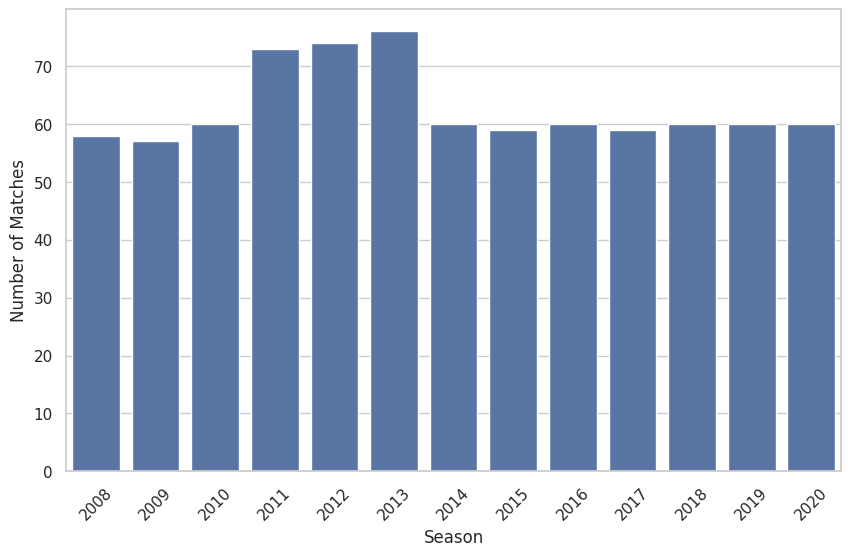

In [ ]:
# visualition
sns.set(style ='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)
sns.barplot(x=matches_per_season.index, y=matches_per_season.values)
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)


In [ ]:
merge_df = ball_df.merge(matches_df[['id','season']],on='id')
merge_df

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,season
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians,2020
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians,2020
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians,2020
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians,2020


In [ ]:
# 2. How many runs were scored in each season?
runs_per_season = merge_df.groupby('season')['total_runs'].sum()
print(runs_per_season)



season
2008    17937
2009    16320
2010    18864
2011    21154
2012    22453
2013    22541
2014    18909
2015    18332
2016    18862
2017    18769
2018    19901
2019    19400
2020    19352
Name: total_runs, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020')])

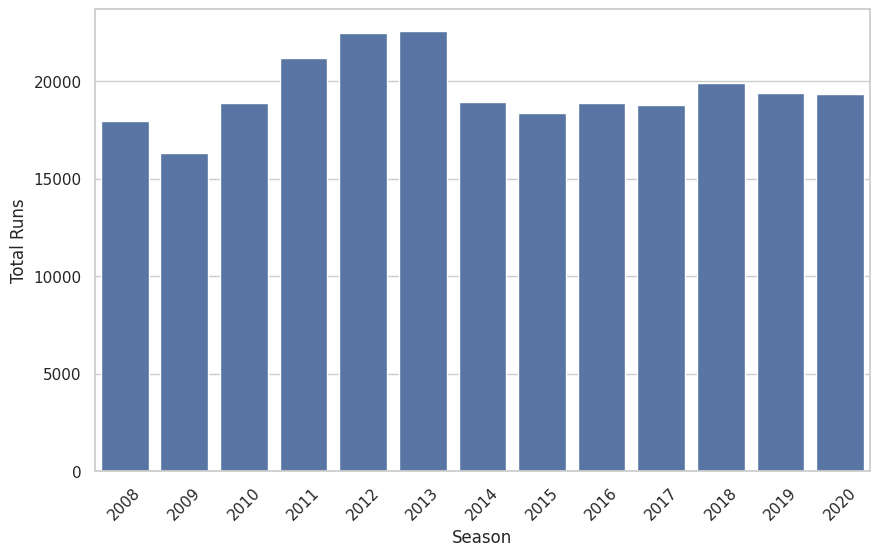

In [ ]:
# visulation
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)
sns.barplot(x=runs_per_season.index, y=runs_per_season.values)
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)


In [ ]:
# 3.What were the runs scored per match in different seasons?
runs_per_match = merge_df.groupby(['season', 'id'])['total_runs'].sum().reset_index()
runs_per_match_per_season = runs_per_match.groupby('season')['total_runs'].mean()
runs_per_match_per_season

,total_runs
season,
2008,309.258621
2009,286.315789
2010,314.400000
2011,289.780822
2012,303.418919
2013,296.592105
2014,315.150000
2015,310.711864
2016,314.366667


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020')])

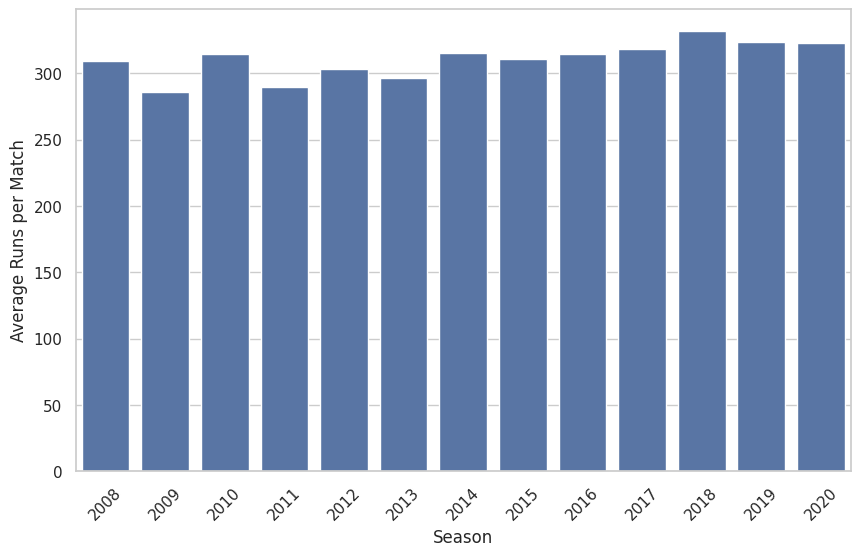

In [ ]:
# visulation
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)
sns.barplot(x=runs_per_match_per_season.index, y=runs_per_match_per_season.values)
plt.xlabel('Season')
plt.ylabel('Average Runs per Match')
plt.xticks(rotation=45)


In [ ]:
#  Who has umpired the most?
umpire_counts = matches_df['umpire1'].value_counts() + matches_df['umpire2'].value_counts()
most_umpired_umpire = umpire_counts.idxmax()
most_umpired_umpire

'S Ravi'

In [ ]:
# Which team has won the most tosses?
toss_winner_counts = matches_df['toss_winner'].value_counts()
most_won_toss_team = toss_winner_counts.idxmax()
most_won_toss_team

'Mumbai Indians'

In [ ]:
# What does the team decide after winning the toss?
toss_decision_counts = matches_df['toss_decision'].value_counts()
most_decided_toss = toss_decision_counts.idxmax()
most_decided_toss

'field'

([0, 1], [Text(0, 0, 'field'), Text(1, 0, 'bat')])

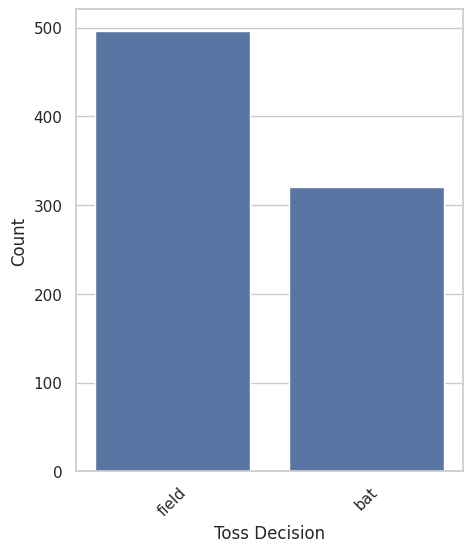

In [ ]:
#  visulation
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (5,6)
sns.barplot(x=toss_decision_counts.index, y=toss_decision_counts.values)
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.xticks(rotation=45)

In [ ]:
# 7. How does the toss decision vary across seasons?
toss_decision_per_season = matches_df.groupby('season')['toss_decision'].value_counts()
toss_decision_per_season

season  toss_decision
2008    field            32
        bat              26
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    field            48
        bat              25
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    field            41
        bat              19
2015    field            34
        bat              25
2016    field            49
        bat              11
2017    field            48
        bat              11
2018    field            50
        bat              10
2019    field            50
        bat              10
2020    field            33
        bat              27
Name: count, dtype: int64

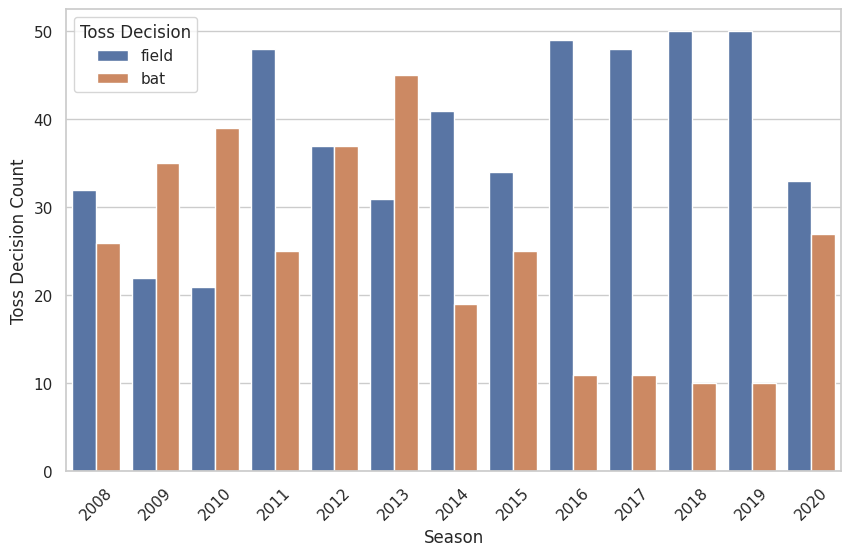

In [ ]:
# visulation
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)
sns.barplot(x=toss_decision_per_season.index.get_level_values(0), y=toss_decision_per_season.values, hue=toss_decision_per_season.index.get_level_values(1))
plt.xlabel('Season')
plt.ylabel('Toss Decision Count')
plt.xticks(rotation=45)
plt.legend(title='Toss Decision')


In [ ]:
# 8. Does winning the toss imply winning the game?
toss_result_df = toss_and_match_result.unstack(fill_value=0)
toss_result_df['total_matches'] = toss_result_df['runs'] + toss_result_df['tie'] + toss_result_df['wickets']
toss_result_df['wins'] = toss_result_df['runs'] + toss_result_df['wickets']
toss_result_df['losses'] = toss_result_df['total_matches'] - toss_result_df['wins']
toss_result_df['win_percentage'] = (toss_result_df['wins'] / toss_result_df['total_matches']) * 100
toss_result_df['loss_percentage'] = (toss_result_df['losses'] / toss_result_df['total_matches']) * 100
toss_win_loss_percentage = toss_result_df[['win_percentage', 'loss_percentage']]
display(toss_win_loss_percentage)

result,win_percentage,loss_percentage
toss_winner,,
Chennai Super Kings,98.969072,1.030928
Deccan Chargers,100.000000,0.000000
Delhi Capitals,95.000000,5.000000
Delhi Daredevils,100.000000,0.000000
Gujarat Lions,93.333333,6.666667
Kings XI Punjab,97.647059,2.352941
Kochi Tuskers Kerala,100.000000,0.000000
Kolkata Knight Riders,98.979592,1.020408
Mumbai Indians,97.169811,2.830189


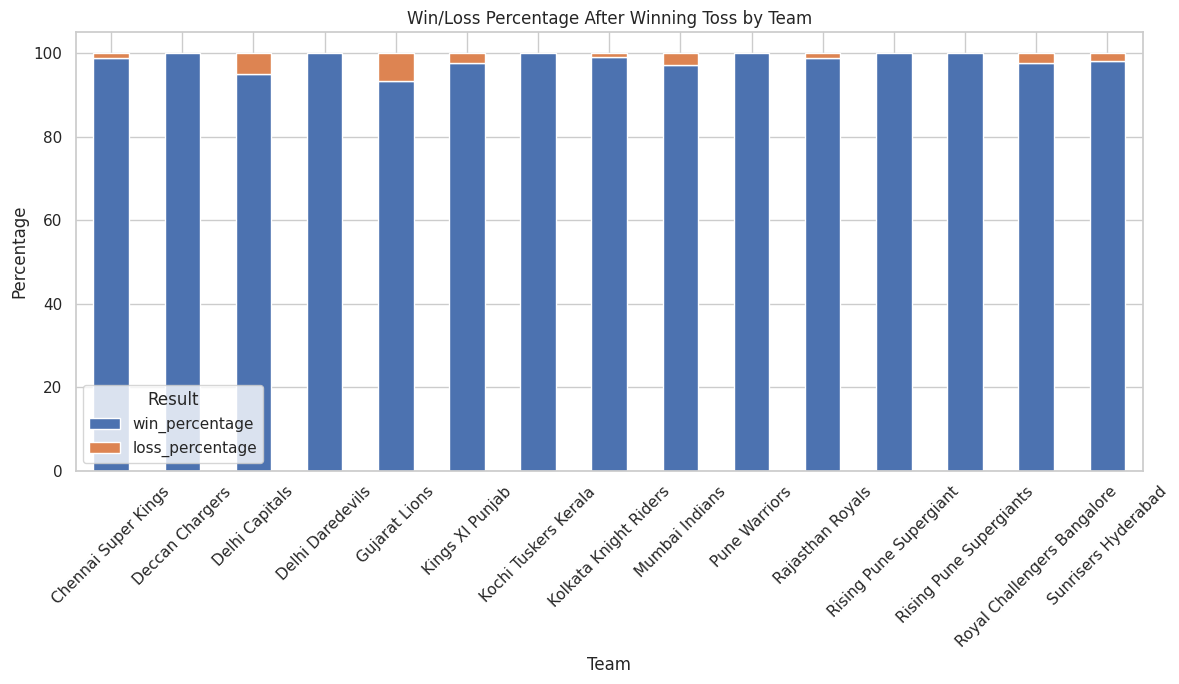

In [ ]:
toss_win_loss_percentage.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Win/Loss Percentage After Winning Toss by Team')
plt.xlabel('Team')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Result')
plt.tight_layout()
plt.show()

In [ ]:
# 9. How many times has the chasing team won the match?
chasing_team_wins = matches_df[matches_df['result'] == 'wickets']['result_margin'].sum()
print("Number of times chasing team won the match:", int(chasing_team_wins))

Number of times chasing team won the match: 2735


In [ ]:
# 10. Which all teams had won this tournament?
winning_teams = matches_df['winner'].value_counts()
print("Winning teams:")
print(winning_teams)


Winning teams:
winner
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


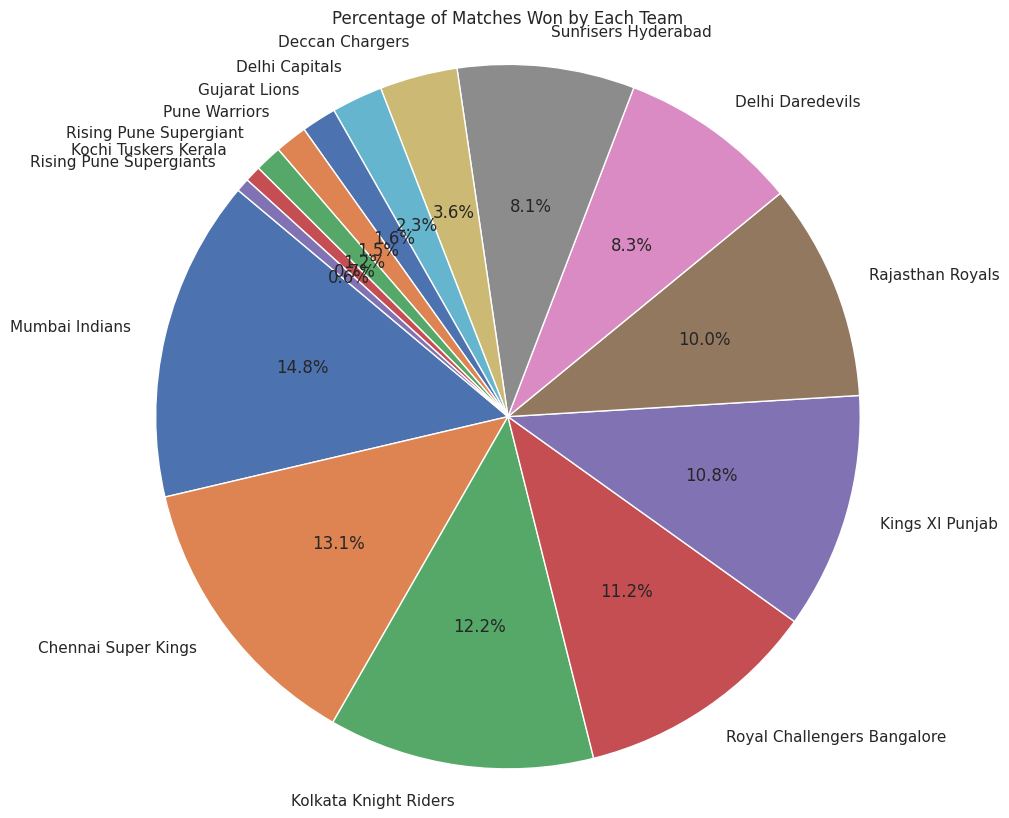

In [ ]:
# Pie chart of winning teams
plt.figure(figsize=(10, 10))
plt.pie(winning_teams, labels=winning_teams.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Matches Won by Each Team')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# 11. Which team has played the most number of matches?
most_played_team = matches_df['team1'].value_counts() + matches_df['team2'].value_counts()
most_played_team


,count
Chennai Super Kings,178
Deccan Chargers,75
Delhi Capitals,33
Delhi Daredevils,161
Gujarat Lions,30
Kings XI Punjab,190
Kochi Tuskers Kerala,14
Kolkata Knight Riders,192
Mumbai Indians,203
Pune Warriors,46


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Chennai Super Kings'),
  Text(1, 0, 'Deccan Chargers'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Delhi Daredevils'),
  Text(4, 0, 'Gujarat Lions'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Kochi Tuskers Kerala'),
  Text(7, 0, 'Kolkata Knight Riders'),
  Text(8, 0, 'Mumbai Indians'),
  Text(9, 0, 'Pune Warriors'),
  Text(10, 0, 'Rajasthan Royals'),
  Text(11, 0, 'Rising Pune Supergiant'),
  Text(12, 0, 'Rising Pune Supergiants'),
  Text(13, 0, 'Royal Challengers Bangalore'),
  Text(14, 0, 'Sunrisers Hyderabad')])

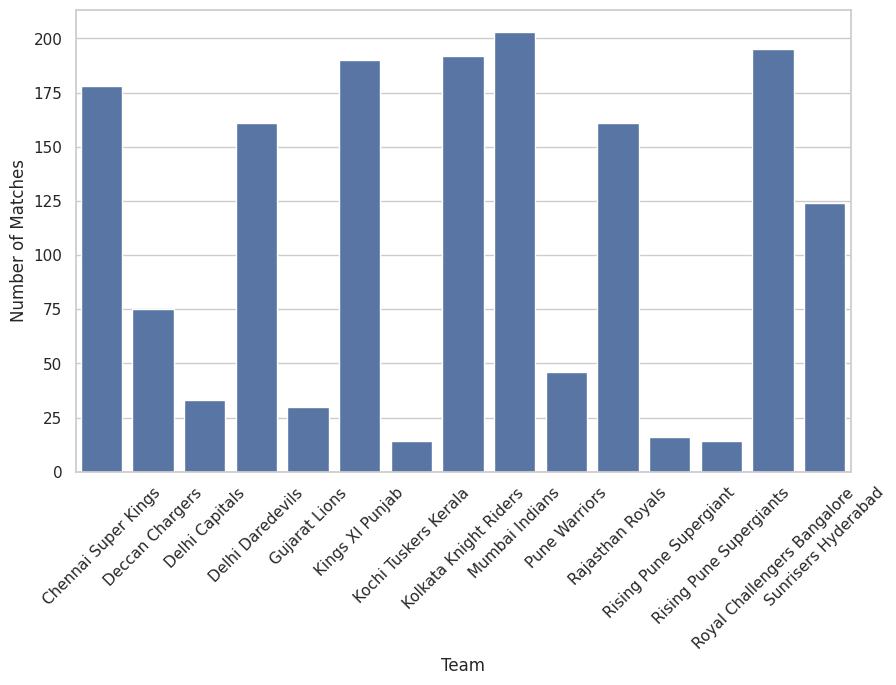

In [ ]:
# visualiation
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)
sns.barplot(x=most_played_team.index, y=most_played_team.values)
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)


In [ ]:
# 12. Which team has won the most number of times?
most_won_team = matches_df['winner'].value_counts()
most_won_team

,count
winner,
Mumbai Indians,120
Chennai Super Kings,106
Kolkata Knight Riders,99
Royal Challengers Bangalore,91
Kings XI Punjab,88
Rajasthan Royals,81
Delhi Daredevils,67
Sunrisers Hyderabad,66
Deccan Chargers,29


/tmp/ipython-input-2560979322.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=most_won_team.index, y=most_won_team.values, palette='viridis')


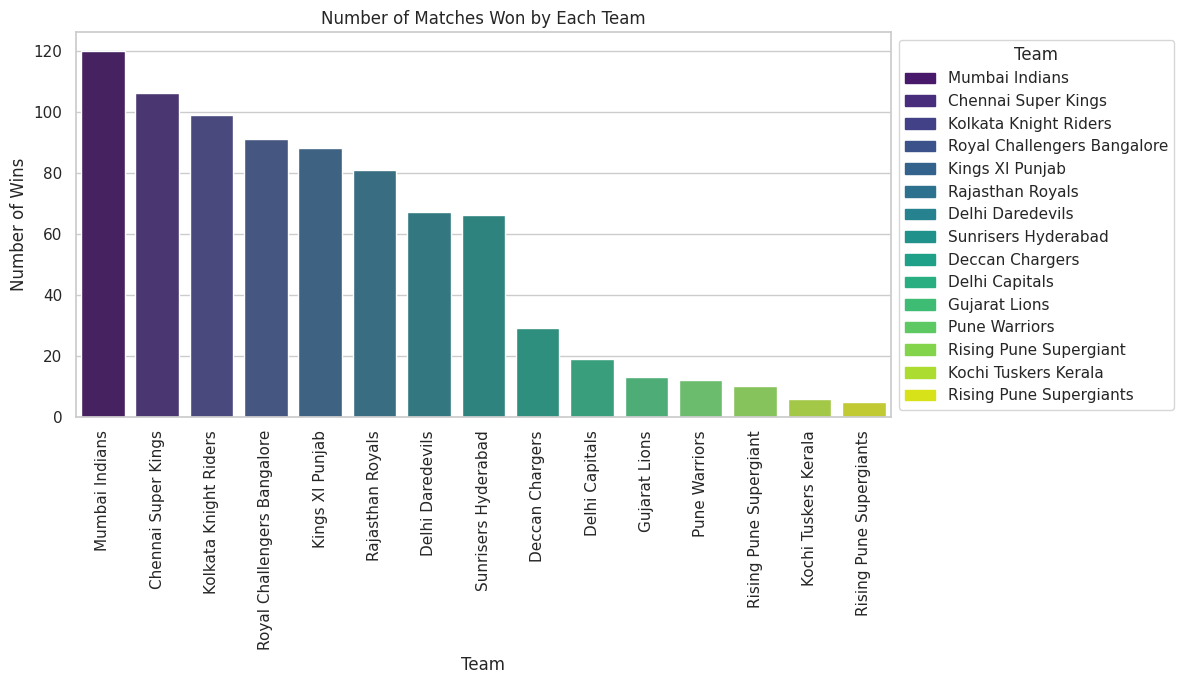

In [ ]:
# visualization
sns.set(style='whitegrid')
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=most_won_team.index, y=most_won_team.values, palette='viridis')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.title('Number of Matches Won by Each Team')

# Create a custom legend
import matplotlib.patches as mpatches
legend_patches = []
colors = sns.color_palette('viridis', len(most_won_team))
for i, team in enumerate(most_won_team.index):
    legend_patches.append(mpatches.Patch(color=colors[i], label=team))

plt.legend(handles=legend_patches, title='Team', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [ ]:
# 13. Which team has the highest winning percentage?
winning_percentage = (most_won_team / most_played_team) * 100
winning_percentage



,count
Chennai Super Kings,59.550562
Deccan Chargers,38.666667
Delhi Capitals,57.575758
Delhi Daredevils,41.614907
Gujarat Lions,43.333333
Kings XI Punjab,46.315789
Kochi Tuskers Kerala,42.857143
Kolkata Knight Riders,51.562500
Mumbai Indians,59.113300
Pune Warriors,26.086957


/tmp/ipython-input-3198842146.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=winning_percentage.index, y=winning_percentage.values, palette='viridis')


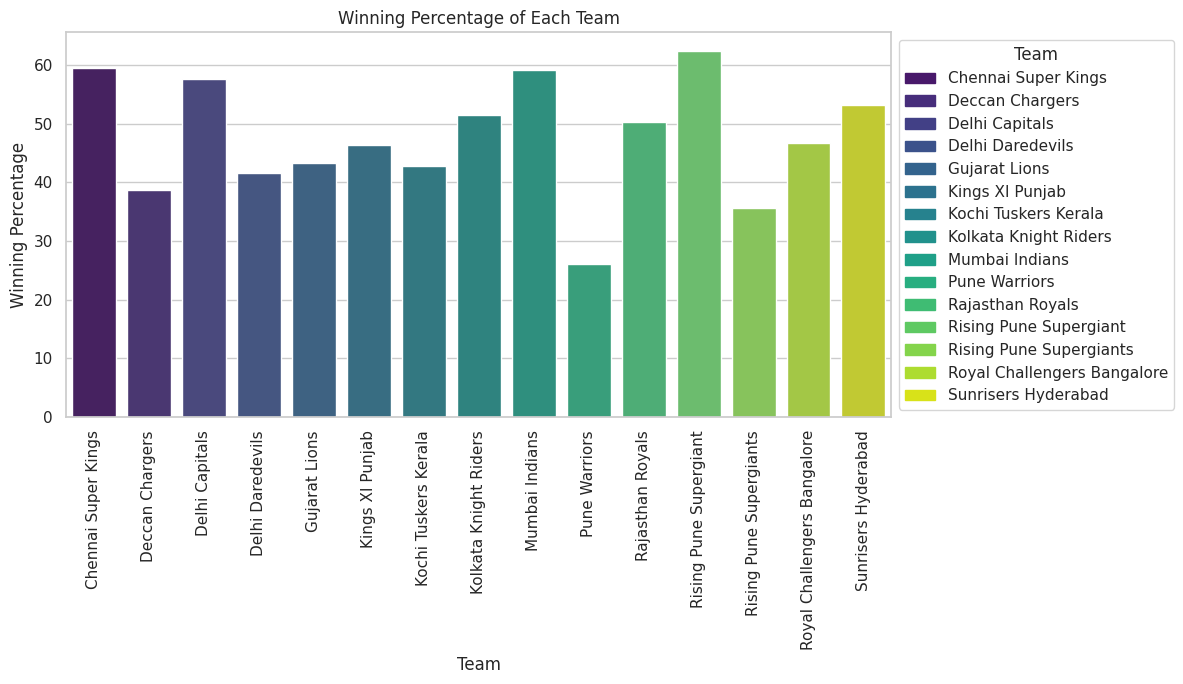

In [ ]:
# visualiation
sns.set(style='whitegrid')
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=winning_percentage.index, y=winning_percentage.values, palette='viridis')
plt.xlabel('Team')
plt.ylabel('Winning Percentage')
plt.xticks(rotation=90)
plt.title('Winning Percentage of Each Team')

# Create a custom legend
import matplotlib.patches as mpatches
legend_patches = []
colors = sns.color_palette('viridis', len(winning_percentage))
for i, team in enumerate(winning_percentage.index):
    legend_patches.append(mpatches.Patch(color=colors[i], label=team))

plt.legend(handles=legend_patches, title='Team', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [ ]:
# 14. Is there any lucky venue for a particular team?

# We need to find out how many times each team has won at each venue.
# First, merge the matches and ball dataframes to get venue and winner information for each match.
venue_wins = matches_df.groupby(['venue', 'winner']).size().reset_index(name='wins')

# Now, we can sort the results to see which team has the most wins at a particular venue.
lucky_venues = venue_wins.sort_values(by='wins', ascending=False)

# Display the top winning teams at each venue.
display(lucky_venues.head(10))

,venue,winner,wins
45,Eden Gardens,Kolkata Knight Riders,45
242,Wankhede Stadium,Mumbai Indians,42
106,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,40
187,Sawai Mansingh Stadium,Rajasthan Royals,32
167,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,30
98,M Chinnaswamy Stadium,Royal Challengers Bangalore,29
54,Feroz Shah Kotla,Delhi Daredevils,27
148,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,18
141,"Punjab Cricket Association IS Bindra Stadium, ...",Kings XI Punjab,12
46,Eden Gardens,Mumbai Indians,10


In [ ]:
# 15. Innings wise comparison between teams



In [ ]:
# 15. Innings wise comparison between teams

# Group by batting team and inning, and sum the total runs
innings_runs = merge_df.groupby(['batting_team', 'inning'])['total_runs'].sum().reset_index()

# Pivot the table to have teams as rows, innings as columns, and total runs as values
innings_comparison = innings_runs.pivot(index='batting_team', columns='inning', values='total_runs').fillna(0)

# Display the innings wise comparison
display(innings_comparison)

inning,1,2
batting_team,,
Chennai Super Kings,15344,13019
Deccan Chargers,6765,4698
Delhi Capitals,2860,2436
Delhi Daredevils,11247,13038
Gujarat Lions,2267,2589
Kings XI Punjab,15710,14307
Kochi Tuskers Kerala,1009,892
Kolkata Knight Riders,14842,14541
Mumbai Indians,18338,13948


In [ ]:
# 16. Which team has scored the most number of 200+ scores?

# Calculate total runs per team per match
team_match_runs = merge_df.groupby(['id', 'batting_team'])['total_runs'].sum().reset_index()

# Filter for matches where the total runs are 200 or more
teams_with_200_plus = team_match_runs[team_match_runs['total_runs'] >= 200]

# Count the number of 200+ scores for each team
team_200_scores_count = teams_with_200_plus['batting_team'].value_counts()

# Find the team with the most 200+ scores
team_with_most_200_scores = team_200_scores_count.idxmax()

print(f"The team with the most 200+ scores in a match is: {team_with_most_200_scores}")
display(team_200_scores_count)

The team with the most 200+ scores in a match is: Royal Challengers Bangalore


,count
batting_team,
Royal Challengers Bangalore,19
Chennai Super Kings,17
Kings XI Punjab,14
Mumbai Indians,14
Kolkata Knight Riders,12
Sunrisers Hyderabad,12
Rajasthan Royals,9
Delhi Daredevils,5
Delhi Capitals,2


In [ ]:
# 17. Which team has conceded 200+ scores the most?

# Calculate total runs conceded per team per match
conceded_runs = merge_df.groupby(['id', 'bowling_team'])['total_runs'].sum().reset_index()

# Filter for matches where the total runs conceded are 200 or more
teams_conceded_200_plus = conceded_runs[conceded_runs['total_runs'] >= 200]

# Count the number of times each team has conceded 200+ scores
team_conceded_200_scores_count = teams_conceded_200_plus['bowling_team'].value_counts()

# Find the team that has conceded the most 200+ scores
team_conceded_most_200_scores = team_conceded_200_scores_count.idxmax()

print(f"The team that has conceded the most 200+ scores in a match is: {team_conceded_most_200_scores}")
display(team_conceded_200_scores_count)

The team that has conceded the most 200+ scores in a match is: Kings XI Punjab


,count
bowling_team,
Kings XI Punjab,20
Royal Challengers Bangalore,17
Chennai Super Kings,12
Delhi Daredevils,11
Rajasthan Royals,10
Kolkata Knight Riders,10
Mumbai Indians,8
Sunrisers Hyderabad,7
Delhi Capitals,3


In [ ]:
# 18. What was the highest run scored by a team in a single match?

# Calculate total runs per team per match
team_match_runs = merge_df.groupby(['id', 'batting_team'])['total_runs'].sum().reset_index()

# Find the highest run scored in a single match
highest_run_in_match = team_match_runs['total_runs'].max()

# Find the match and team that scored the highest runs
highest_run_match_info = team_match_runs[team_match_runs['total_runs'] == highest_run_in_match]

print(f"The highest run scored by a team in a single match is: {highest_run_in_match}")
display(highest_run_match_info)

The highest run scored by a team in a single match is: 263


,id,batting_team,total_runs
702,598027,Royal Challengers Bangalore,263


In [ ]:
# 19. Which is the biggest win in terms of run margin?

# Filter for matches won by runs
wins_by_runs = matches_df[matches_df['result'] == 'runs']

# Find the maximum run margin
biggest_win_margin = wins_by_runs['result_margin'].max()

# Find the match(es) with the biggest win margin
biggest_win_match_info = wins_by_runs[wins_by_runs['result_margin'] == biggest_win_margin]

print(f"The biggest win in terms of run margin is: {biggest_win_margin}")
display(biggest_win_match_info)

The biggest win in terms of run margin is: 146.0


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


,count
batsman,
V Kohli,4609
S Dhawan,4208
RG Sharma,4088
SK Raina,4041
DA Warner,3819
RV Uthappa,3658
G Gambhir,3524
MS Dhoni,3493
CH Gayle,3342


/tmp/ipython-input-47076700.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balls_faced.head(10).index, y=balls_faced.head(10).values, palette='viridis')


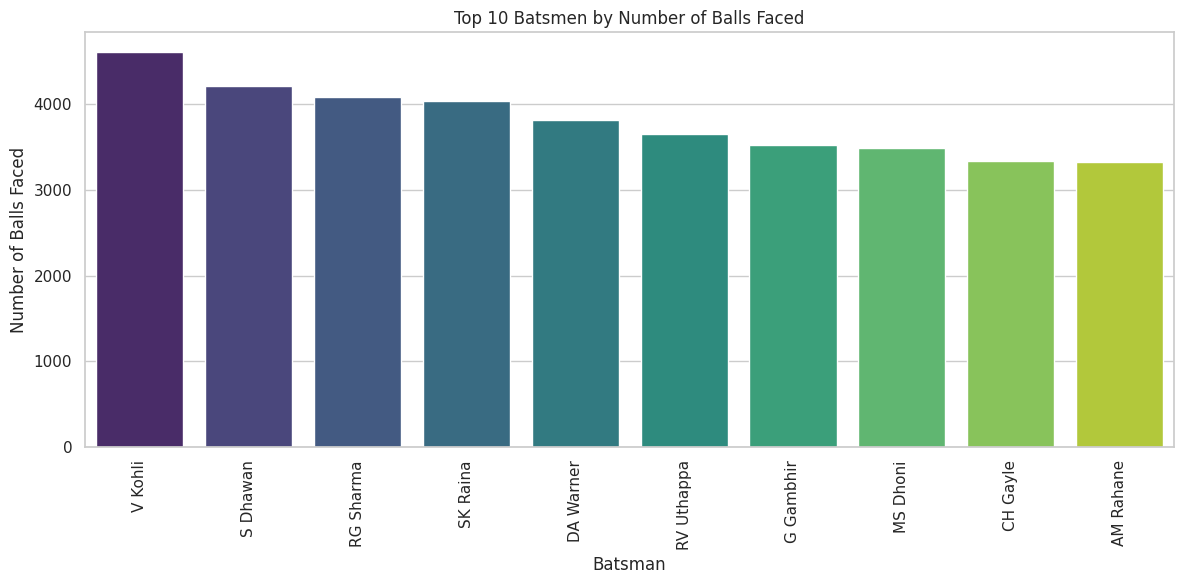

In [ ]:
# 20. Which batsmen have played the most number of balls?

# Count the number of balls for each batsman
balls_faced = ball_df['batsman'].value_counts()

# Display the top batsmen by balls faced
display(balls_faced.head(10))

# Visualizing the batsmen who have played the most balls
plt.figure(figsize=(12, 6))
sns.barplot(x=balls_faced.head(10).index, y=balls_faced.head(10).values, palette='viridis')
plt.xlabel('Batsman')
plt.ylabel('Number of Balls Faced')
plt.title('Top 10 Batsmen by Number of Balls Faced')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# 21. Who are the leading run-scorers of all time?

# Calculate total runs scored by each batsman
runs_scored = ball_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)

# Display the leading run-scorers
display(runs_scored.head(10))

,batsman_runs
batsman,
V Kohli,5878
SK Raina,5368
DA Warner,5254
RG Sharma,5230
S Dhawan,5197
AB de Villiers,4849
CH Gayle,4772
MS Dhoni,4632
RV Uthappa,4607


/tmp/ipython-input-1429666149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_scored.head(10).index, y=runs_scored.head(10).values, palette='viridis')


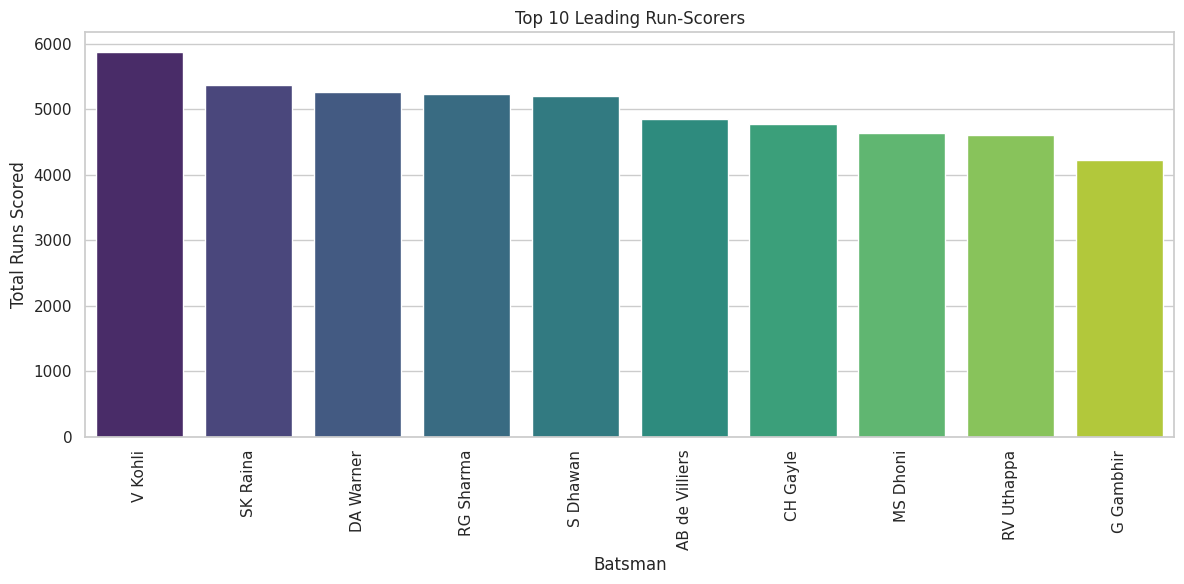

In [ ]:
# Visualizing the leading run-scorers
plt.figure(figsize=(12, 6))
sns.barplot(x=runs_scored.head(10).index, y=runs_scored.head(10).values, palette='viridis')
plt.xlabel('Batsman')
plt.ylabel('Total Runs Scored')
plt.title('Top 10 Leading Run-Scorers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# 22. Who has hit the most number of 4's?

# Filter for runs that are 4 and not a non_boundary
fours = ball_df[(ball_df['batsman_runs'] == 4) & (ball_df['non_boundary'] == 0)]

# Count the number of 4s hit by each batsman
fours_count = fours['batsman'].value_counts()

# Display the top batsmen with most 4s
display(fours_count.head(10))

,count
batsman,
S Dhawan,591
DA Warner,510
V Kohli,503
SK Raina,493
G Gambhir,492
RG Sharma,458
RV Uthappa,454
AM Rahane,416
AB de Villiers,390


/tmp/ipython-input-2330622289.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fours_count.head(10).index, y=fours_count.head(10).values, palette='viridis')


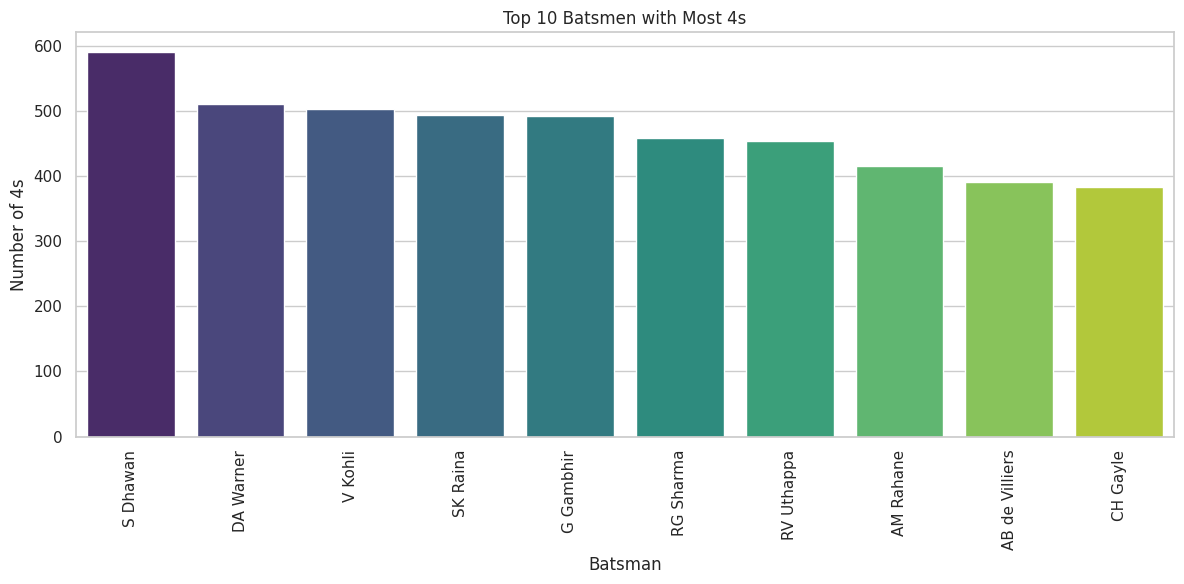

In [ ]:
# Visualizing the batsmen who have hit the most 4s
plt.figure(figsize=(12, 6))
sns.barplot(x=fours_count.head(10).index, y=fours_count.head(10).values, palette='viridis')
plt.xlabel('Batsman')
plt.ylabel('Number of 4s')
plt.title('Top 10 Batsmen with Most 4s')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# 23. Who has hit the most number of 6's?

# Filter for runs that are 6 and not a non_boundary
sixes = ball_df[(ball_df['batsman_runs'] == 6) & (ball_df['non_boundary'] == 0)]

# Count the number of 6s hit by each batsman
sixes_count = sixes['batsman'].value_counts()

# Display the top batsmen with most 6s
display(sixes_count.head(10))

,count
batsman,
CH Gayle,349
AB de Villiers,235
MS Dhoni,216
RG Sharma,213
V Kohli,201
KA Pollard,198
DA Warner,195
SK Raina,194
SR Watson,190


/tmp/ipython-input-2269191903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sixes_count.head(10).index, y=sixes_count.head(10).values, palette='viridis')


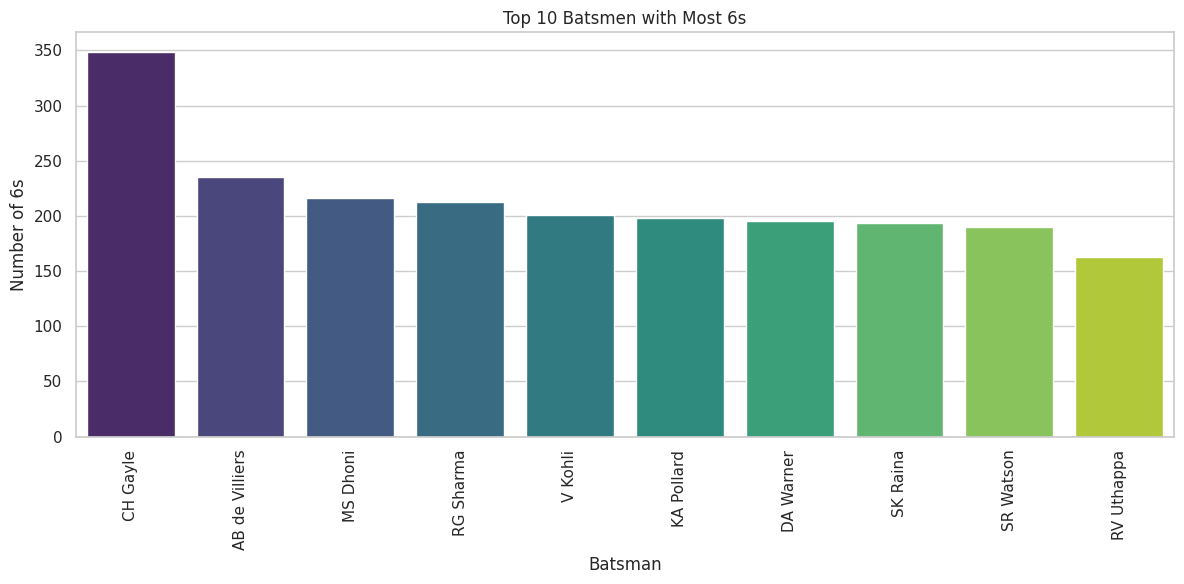

In [ ]:
# Visualizing the batsmen who have hit the most 6s
plt.figure(figsize=(12, 6))
sns.barplot(x=sixes_count.head(10).index, y=sixes_count.head(10).values, palette='viridis')
plt.xlabel('Batsman')
plt.ylabel('Number of 6s')
plt.title('Top 10 Batsmen with Most 6s')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# 24. Who has the highest strike rate?

# Calculate strike rate (runs per 100 balls)
# We need to ensure that batsmen have faced a reasonable number of balls to have a meaningful strike rate.
# Let's set a minimum threshold for balls faced, e.g., 500 balls.
min_balls_faced = 500

# Combine runs scored and balls faced for batsmen who have faced at least the minimum number of balls
batsman_stats = pd.DataFrame({
    'runs': runs_scored,
    'balls_faced': balls_faced
}).dropna()

batsman_stats = batsman_stats[batsman_stats['balls_faced'] >= min_balls_faced]

batsman_stats['strike_rate'] = (batsman_stats['runs'] / batsman_stats['balls_faced']) * 100

# Sort by strike rate in descending order
highest_strike_rate = batsman_stats.sort_values(by='strike_rate', ascending=False)

# Display the top batsmen with the highest strike rate
display(highest_strike_rate.head(10))

,runs,balls_faced,strike_rate
batsman,,,
AD Russell,1517,882,171.995465
SP Narine,892,573,155.671902
HH Pandya,1349,897,150.390190
V Sehwag,2728,1833,148.827059
GJ Maxwell,1505,1013,148.568608
AB de Villiers,4849,3264,148.560049
RR Pant,2079,1416,146.822034
JC Buttler,1714,1184,144.763514
KA Pollard,3023,2107,143.474134


/tmp/ipython-input-834660122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highest_strike_rate.head(10).index, y=highest_strike_rate.head(10)['strike_rate'], palette='viridis')


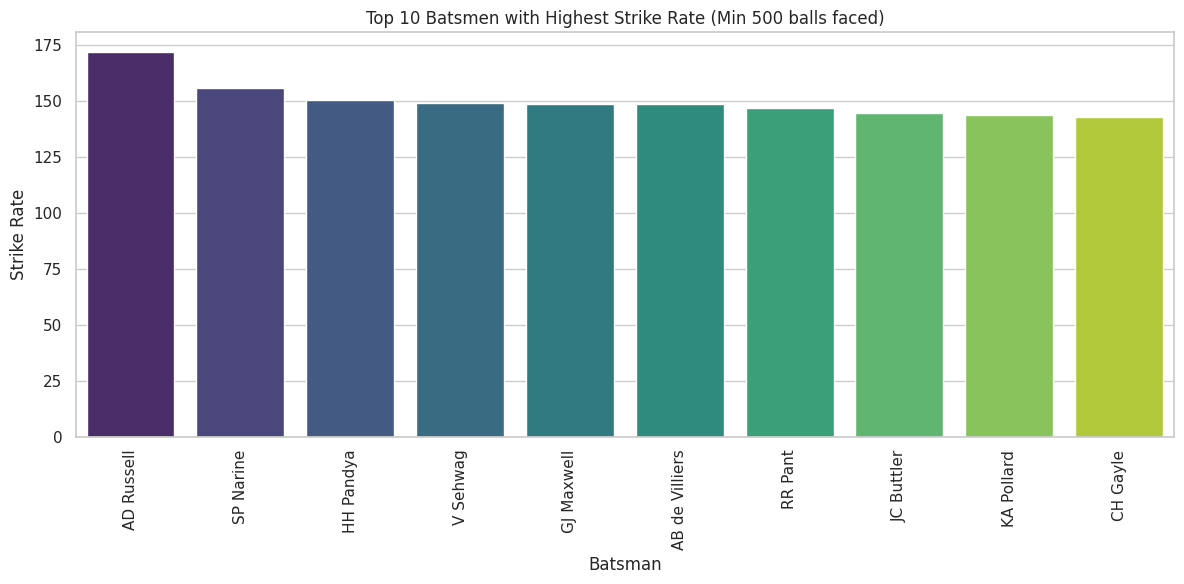

In [ ]:
# Visualizing the batsmen with the highest strike rate
plt.figure(figsize=(12, 6))
sns.barplot(x=highest_strike_rate.head(10).index, y=highest_strike_rate.head(10)['strike_rate'], palette='viridis')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.title('Top 10 Batsmen with Highest Strike Rate (Min 500 balls faced)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# 25. Who is the leading wicket-taker?

# Filter for wickets
wickets = ball_df[ball_df['is_wicket'] == 1]

# Count the number of wickets taken by each bowler
wicket_counts = wickets['bowler'].value_counts()

# Display the top wicket-takers
display(wicket_counts.head(10))

,count
bowler,
SL Malinga,188
DJ Bravo,175
A Mishra,169
PP Chawla,164
Harbhajan Singh,161
R Ashwin,153
B Kumar,146
SP Narine,143
UT Yadav,137


/tmp/ipython-input-72739096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wicket_counts.head(10).index, y=wicket_counts.head(10).values, palette='viridis')


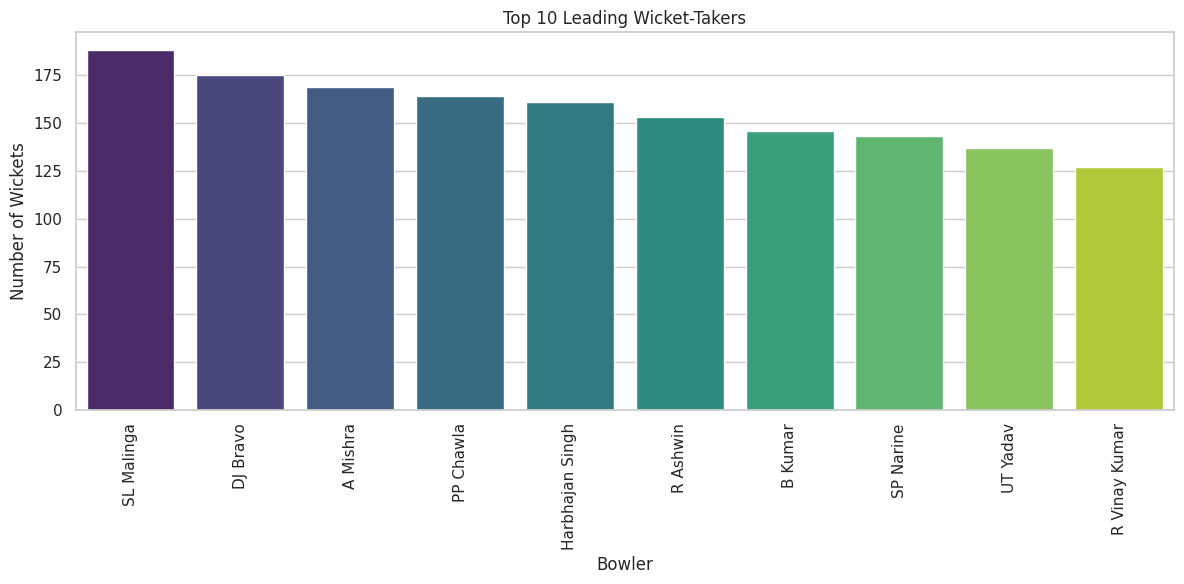

In [ ]:
# Visualizing the leading wicket-takers
plt.figure(figsize=(12, 6))
sns.barplot(x=wicket_counts.head(10).index, y=wicket_counts.head(10).values, palette='viridis')
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets')
plt.title('Top 10 Leading Wicket-Takers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# 26. Which stadium has hosted the most number of matches?

# Count the number of matches for each venue
venue_counts = matches_df['venue'].value_counts()

# Display the stadium that has hosted the most matches
display(venue_counts.head(1))

,count
venue,
Eden Gardens,77


In [ ]:
# 27. Who has won the most MOM awards?

# Count the number of Player of the Match awards for each player
mom_counts = matches_df['player_of_match'].value_counts()

# Display the player with the most MOM awards
display(mom_counts.head(1))

,count
player_of_match,
AB de Villiers,23


In [ ]:
# 28. What is the count of fours hit in each season?

# Filter for runs that are 4 and not a non_boundary
fours_per_season = merge_df[(merge_df['batsman_runs'] == 4) & (merge_df['non_boundary'] == 0)]

# Group by season and count the number of 4s
fours_count_per_season = fours_per_season.groupby('season').size()

# Display the count of fours per season
display(fours_count_per_season)

,0
season,
2008,1703
2009,1316
2010,1708
2011,1913
2012,1911
2013,2051
2014,1562
2015,1607
2016,1632


In [ ]:
# 29. What is the count of sixes hit in each season?

# Filter for runs that are 6 and not a non_boundary
sixes_per_season = merge_df[(merge_df['batsman_runs'] == 6) & (merge_df['non_boundary'] == 0)]

# Group by season and count the number of 6s
sixes_count_per_season = sixes_per_season.groupby('season').size()

# Display the count of sixes per season
display(sixes_count_per_season)

,0
season,
2008,622
2009,506
2010,585
2011,639
2012,731
2013,674
2014,714
2015,692
2016,638


In [ ]:
# 30. What is the count of runs scored from boundaries in each season?

# Filter for runs that are 4 or 6 and not a non_boundary
boundary_runs_per_season = merge_df[((merge_df['batsman_runs'] == 4) | (merge_df['batsman_runs'] == 6)) & (merge_df['non_boundary'] == 0)]

# Group by season and sum the runs from boundaries
boundary_runs_count_per_season = boundary_runs_per_season.groupby('season')['batsman_runs'].sum()

# Display the count of runs from boundaries per season
display(boundary_runs_count_per_season)

,batsman_runs
season,
2008,10544
2009,8300
2010,10342
2011,11486
2012,12030
2013,12248
2014,10532
2015,10580
2016,10356


In [ ]:
# 31. What is the run contribution from boundaries in each season?

# Calculate the percentage of runs from boundaries in each season
boundary_run_contribution_per_season = (boundary_runs_count_per_season / runs_per_season) * 100

# Display the run contribution from boundaries per season
display(boundary_run_contribution_per_season)

,0
season,
2008,58.783520
2009,50.857843
2010,54.824003
2011,54.297060
2012,53.578586
2013,54.336542
2014,55.698345
2015,57.713288
2016,54.904040


In [ ]:
# 32. Which team has scored the most runs in the first 6 overs?

# Filter for overs in the powerplay (overs 1 to 6)
powerplay_runs = merge_df[merge_df['over'] <= 6]

# Group by batting team and sum the total runs in the powerplay
powerplay_runs_by_team = powerplay_runs.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

# Display the team with the most runs in the first 6 overs
display(powerplay_runs_by_team.head(1))

,total_runs
batting_team,
Mumbai Indians,10476


In [ ]:
# 33. Which team has scored the most runs in the last 4 overs?

# Filter for overs in the death overs (overs 17 to 20)
death_overs_runs = merge_df[merge_df['over'] >= 17]

# Group by batting team and sum the total runs in the death overs
death_overs_runs_by_team = death_overs_runs.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

# Display the team with the most runs in the last 4 overs
display(death_overs_runs_by_team.head(1))

,total_runs
batting_team,
Mumbai Indians,5708


In [ ]:
# 34. Which team has the best scoring run-rate in the first 6 overs?

# Filter for overs in the powerplay (overs 1 to 6)
powerplay_data = merge_df[merge_df['over'] <= 6]

# Calculate total runs and total balls faced by each team in the powerplay
powerplay_stats = powerplay_data.groupby('batting_team').agg(
    total_runs=('total_runs', 'sum'),
    total_balls=('ball', 'count') # Count the number of balls faced
).reset_index()

# Calculate run rate (runs per over)
powerplay_stats['run_rate'] = (powerplay_stats['total_runs'] / powerplay_stats['total_balls']) * 6

# Sort by run rate in descending order
best_powerplay_run_rate = powerplay_stats.sort_values(by='run_rate', ascending=False)

# Display the team with the best scoring run-rate in the first 6 overs
display(best_powerplay_run_rate.head(1))

,batting_team,total_runs,total_balls,run_rate
4,Gujarat Lions,1812,1309,8.305577


In [ ]:
# 35. Which team has the best scoring run-rate in the last 4 overs?

# Filter for overs in the death overs (overs 17 to 20)
death_overs_data = merge_df[merge_df['over'] >= 17]

# Calculate total runs and total balls faced by each team in the death overs
death_overs_stats = death_overs_data.groupby('batting_team').agg(
    total_runs=('total_runs', 'sum'),
    total_balls=('ball', 'count') # Count the number of balls faced
).reset_index()

# Calculate run rate (runs per over)
death_overs_stats['run_rate'] = (death_overs_stats['total_runs'] / death_overs_stats['total_balls']) * 6

# Sort by run rate in descending order
best_death_overs_run_rate = death_overs_stats.sort_values(by='run_rate', ascending=False)

# Display the team with the best scoring run-rate in the last 4 overs
display(best_death_overs_run_rate.head(1))

,batting_team,total_runs,total_balls,run_rate
12,Rising Pune Supergiants,330,186,10.645161


## Conclusion

Based on the analysis of the IPL dataset from 2008 to 2020, here are some key findings and interesting trends:

**Match and Run Trends:**
*   The number of matches played per season has varied, with a notable increase in 2011, 2012, and 2013.
*   Total runs scored per season generally increased over the years, with some fluctuations.
*   Average runs scored per match also show an upward trend, indicating higher scoring games in recent seasons.

**Team Performance:**
*   Mumbai Indians is the most successful team in terms of the number of matches won.
*   Mumbai Indians has also played the most number of matches.
*   While Mumbai Indians has won the most matches, Rising Pune Supergiant has the highest winning percentage (among teams that have played a reasonable number of matches).
*   Eden Gardens and Wankhede Stadium are the venues where Kolkata Knight Riders and Mumbai Indians have the most wins, respectively.

**Toss Analysis:**
*   Teams winning the toss tend to choose to field first more often than bat first.
*   The preference for fielding first after winning the toss has become more prominent in recent seasons.
*   Winning the toss does not guarantee winning the match, although teams winning the toss have a high overall win percentage.

**Batting Statistics:**
*   Virat Kohli has faced the most balls and is the leading run-scorer of all time.
*   Shikhar Dhawan has hit the most fours.
*   Chris Gayle has hit the most sixes.
*   Andre Russell has the highest strike rate (among batsmen facing at least 500 balls), highlighting his explosive batting.
*   A significant portion of runs in each season comes from boundaries (fours and sixes).

**Bowling Statistics:**
*   Lasith Malinga is the leading wicket-taker.

**Venue Analysis:**
*   Eden Gardens has hosted the most number of matches.

**Powerplay and Death Overs:**
*   Mumbai Indians has scored the most runs in both the first 6 overs (powerplay) and the last 4 overs (death overs).
*   Gujarat Lions had the best scoring run-rate in the first 6 overs.
*   Rising Pune Supergiants had the best scoring run-rate in the last 4 overs.

**Overall Trends:**
The analysis reveals an increasing trend in the number of matches, total runs, and average runs per match over the seasons. Teams winning the toss increasingly prefer to field. Mumbai Indians stands out as a dominant team in terms of both matches played and won, as well as scoring in crucial phases of the game. While individual batsmen and bowlers have set impressive records, the contribution of boundaries to the total runs remains significant across seasons.

/tmp/ipython-input-2845646075.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_per_season.index, y=runs_per_season.values, palette='viridis')


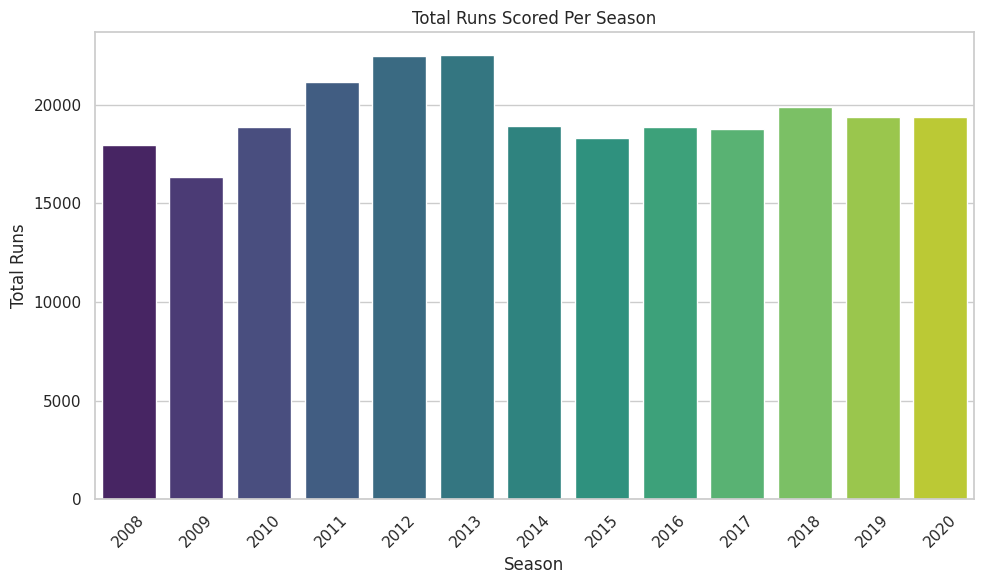

In [ ]:
# Visualize Total Runs Per Season
plt.figure(figsize=(10, 6))
sns.barplot(x=runs_per_season.index, y=runs_per_season.values, palette='viridis')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.title('Total Runs Scored Per Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1931327823.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_won_team.head(10).index, y=most_won_team.head(10).values, palette='viridis')


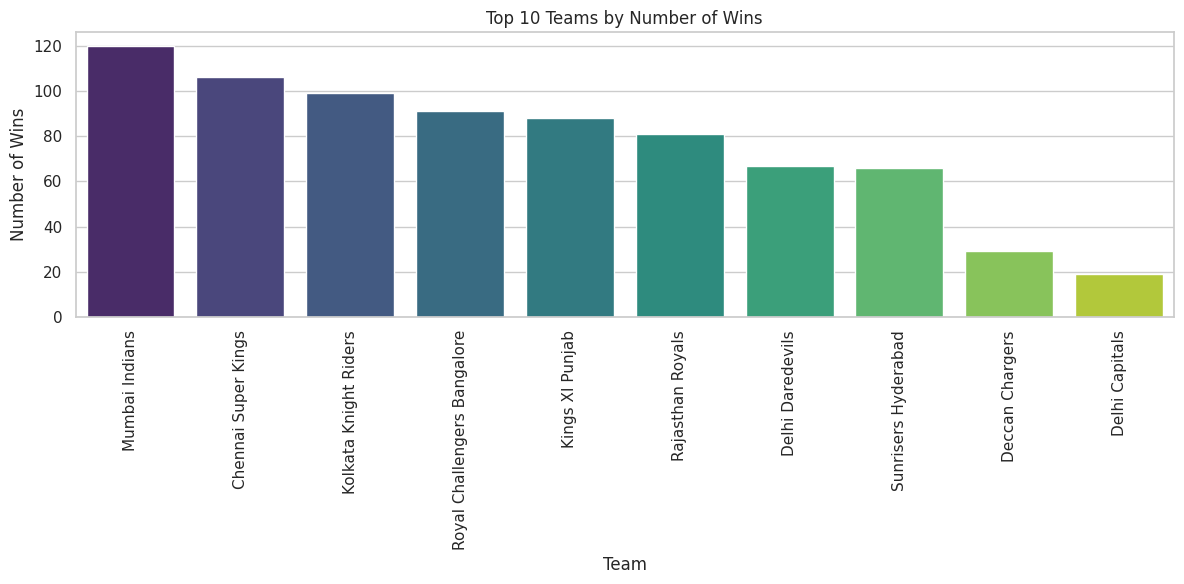

In [ ]:
# Visualize Number of Matches Won by Top Teams
plt.figure(figsize=(12, 6))
sns.barplot(x=most_won_team.head(10).index, y=most_won_team.head(10).values, palette='viridis')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.title('Top 10 Teams by Number of Wins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

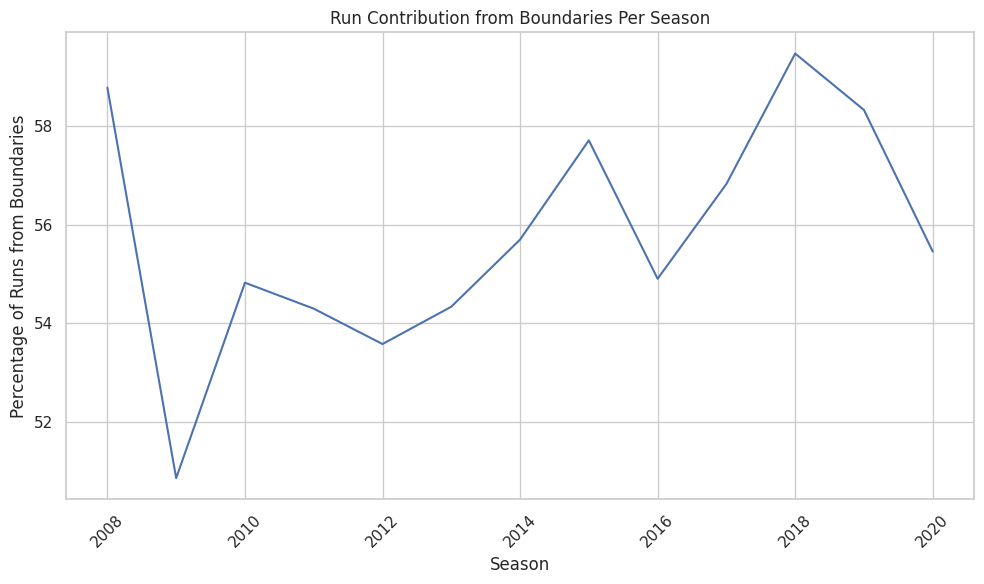

In [ ]:
# Visualize Run Contribution from Boundaries Per Season
plt.figure(figsize=(10, 6))
sns.lineplot(x=boundary_run_contribution_per_season.index, y=boundary_run_contribution_per_season.values)
plt.xlabel('Season')
plt.ylabel('Percentage of Runs from Boundaries')
plt.title('Run Contribution from Boundaries Per Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()